## Exploratory Data Analysis (EDA)
This notebook performs exploratory data analysis on a dataset.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set style for visualizations
sns.set(style="whitegrid")

In [3]:
# Load the dataset into a Pandas DataFrame.
#df = pd.read_csv('data.csv')  # Replace 'data.csv' with your dataset file
df = pd.read_csv('https://tinyurl.com/y9p968ys')

In [4]:
# Display the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## 3. Initial Data Inspection
### 3.1 Dataset Overview

In [5]:
# Check the number of rows and columns.
print("Dataset Shape:", df.shape)

Dataset Shape: (156, 13)


In [6]:
# Check column names
print("Columns:", df.columns)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Lname', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# Display data types of each column
print("Data Types:\n", df.dtypes)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Lname           object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
# Do we really need passenger ID?
df.drop('PassengerId', axis=1, inplace=True)

In [9]:
# Summary statistics for numeric columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [10]:
# We need to be careful not to confuse categorical columns that are not ordinal with numerical ones
df['Survived'] = df['Survived'].map({1: 'Yes', 0: 'No'})
df.describe()


,Pclass,Age,SibSp,Parch,Fare
count,156.000000,126.000000,156.000000,156.000000,156.000000
mean,2.423077,28.141508,0.615385,0.397436,28.109587
std,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.830000,0.000000,0.000000,6.750000
25%,2.000000,19.000000,0.000000,0.000000,8.003150
50%,3.000000,26.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,30.371850
max,3.000000,71.000000,5.000000,5.000000,263.000000


## 4. Handling Missing Data
### 4.1 Identify Missing Values

In [11]:
# Check for missing values in each column
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Survived      0
Pclass        0
Lname         0
Name          0
Sex           0
Age          30
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       125
Embarked      1
dtype: int64


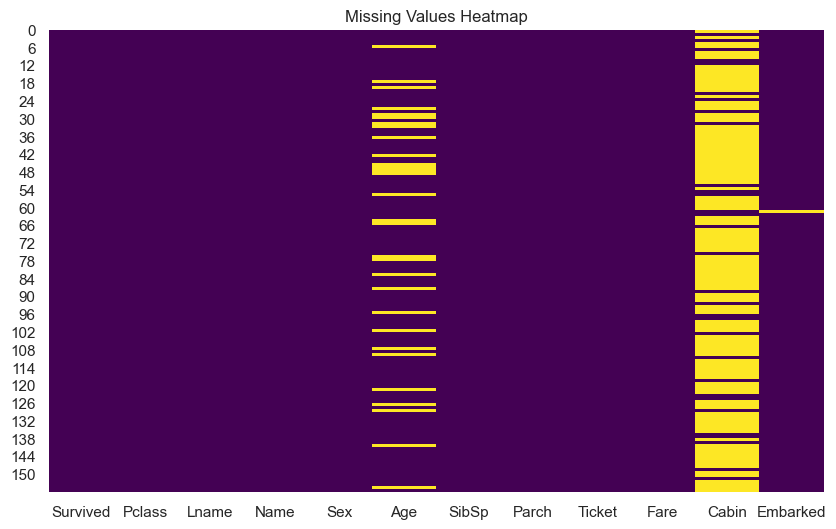

In [12]:
# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### 4.2 Handle Missing Values

In [13]:
# Fill missing values with mean/median/mode or drop them
# Example: Fill numeric columns with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

In [14]:
# Example: Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
# Verify no missing values remain
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 Survived    0
Pclass      0
Lname       0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


## 5. Data Cleaning
### 5.1 Remove Duplicates

In [16]:
df.drop_duplicates(inplace=True)
print("Dataset Shape After Removing Duplicates:", df.shape)

Dataset Shape After Removing Duplicates: (156, 12)


### 5.2 Handle Outliers ( Points that are errors and don't contain information)

In [17]:
# Example: Remove outliers for a numeric column using IQR
#Q1 = df['numeric_column'].quantile(0.25)
#Q3 = df['numeric_column'].quantile(0.75)
#IQR = Q3 - Q1
#df = df[ ~( ( df['numeric_column'] < (Q1 - 1.5 * IQR) ) | (df['numeric_column'] > (Q3 + 1.5 * IQR) ) ) ]

## 6. Univariate Analysis
### 6.1 Numeric Variables

In [18]:
# Create df of numerical columns only
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


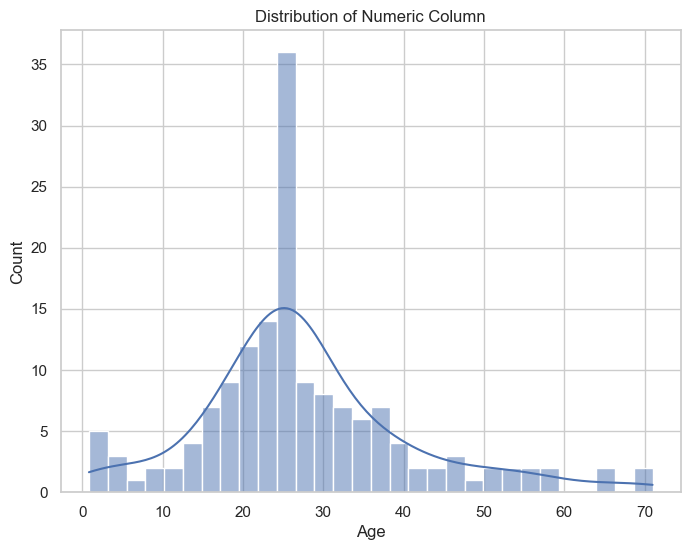

In [19]:
# Histogram for a numeric column
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribution of Numeric Column")
plt.show()

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

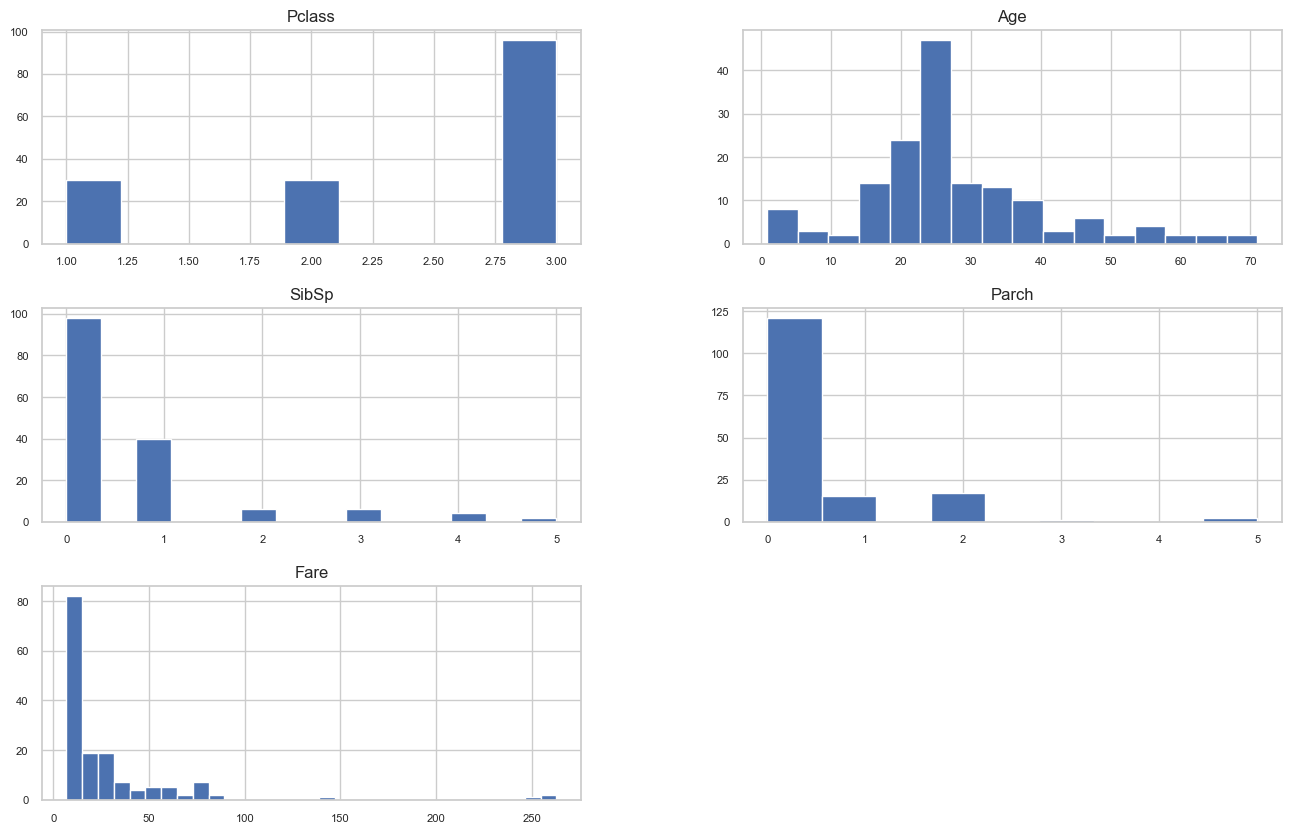

In [20]:
df_num.hist(figsize=(16, 10), bins='auto', xlabelsize=8, ylabelsize=8)

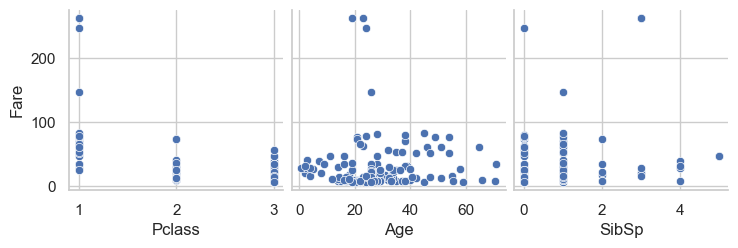

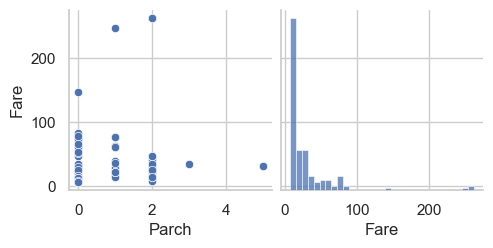

In [21]:
for i in range(0, len(df_num.columns), 3):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+3],
                y_vars=['Fare'])

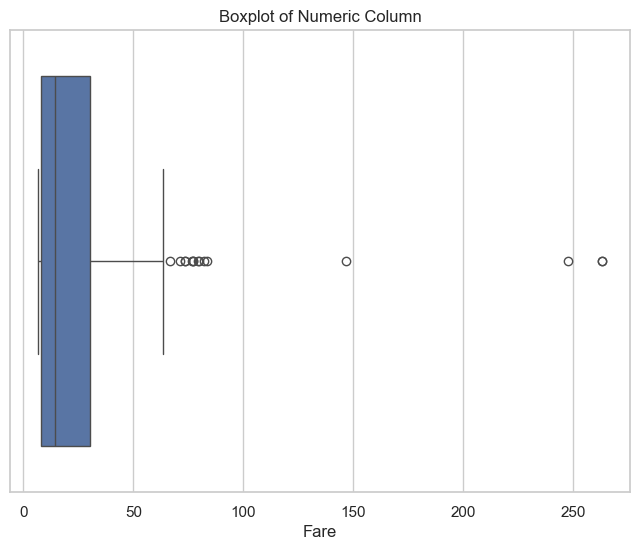

In [22]:
# Boxplot for a numeric column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Numeric Column")
plt.show()

### 6.2 Categorical Variables

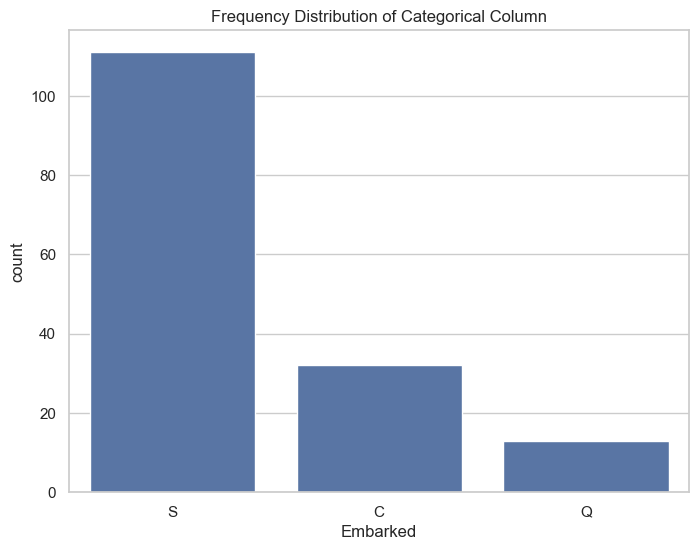

In [23]:
# Bar plot for a categorical column
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df)
plt.title("Frequency Distribution of Categorical Column")
plt.show()

## 7. Bivariate and Multivariate Analysis
### 7.1 Numeric vs. Numeric

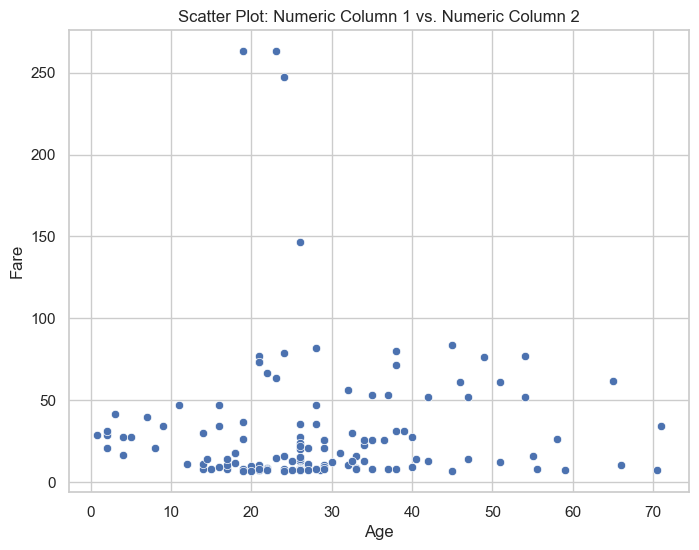

In [24]:
# Scatter plot for two numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title("Scatter Plot: Numeric Column 1 vs. Numeric Column 2")
plt.show()

In [25]:
df_num.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.345158,0.087420,0.016491,-0.607256
Age,-0.345158,1.000000,-0.366484,-0.197654,0.032529
SibSp,0.087420,-0.366484,1.000000,0.399040,0.271997
Parch,0.016491,-0.197654,0.399040,1.000000,0.254822
Fare,-0.607256,0.032529,0.271997,0.254822,1.000000


In [26]:
df_num_corr = df_num.corr()['Pclass'][1:]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Passenger class:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Passenger class:
Fare   -0.607256
Name: Pclass, dtype: float64


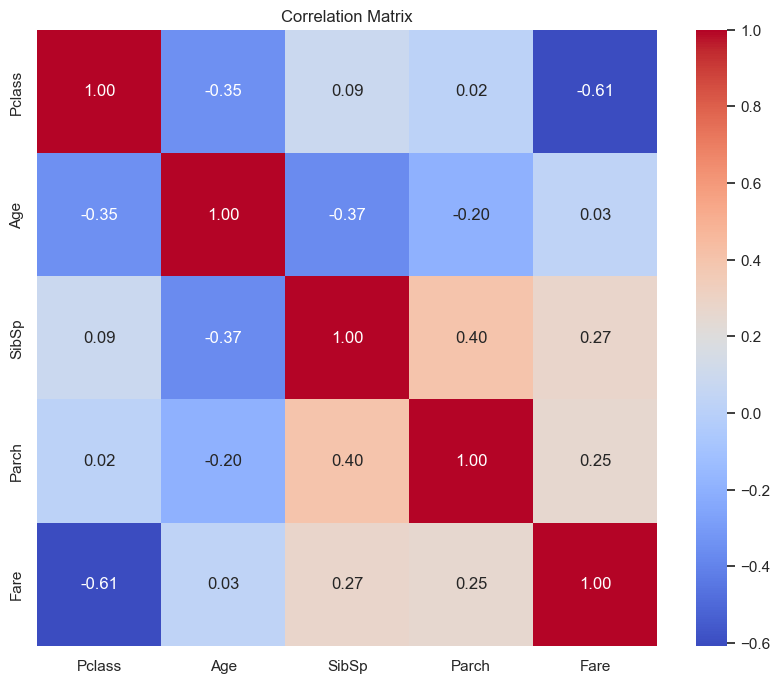

In [27]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<Axes: >

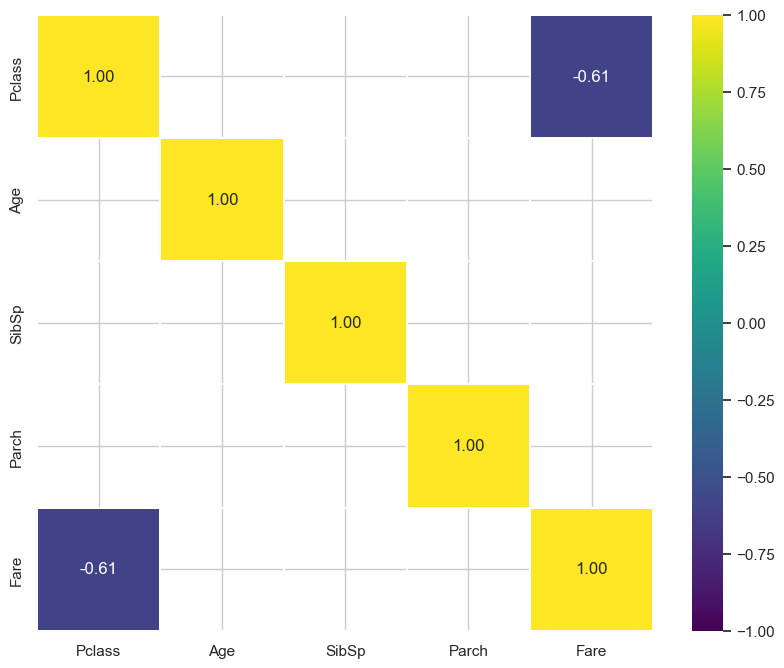

In [28]:
# Play with arguments fot better visualizations
corr = df_num.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, fmt=".2f", square=True)


### 7.2 Numeric vs. Categorical

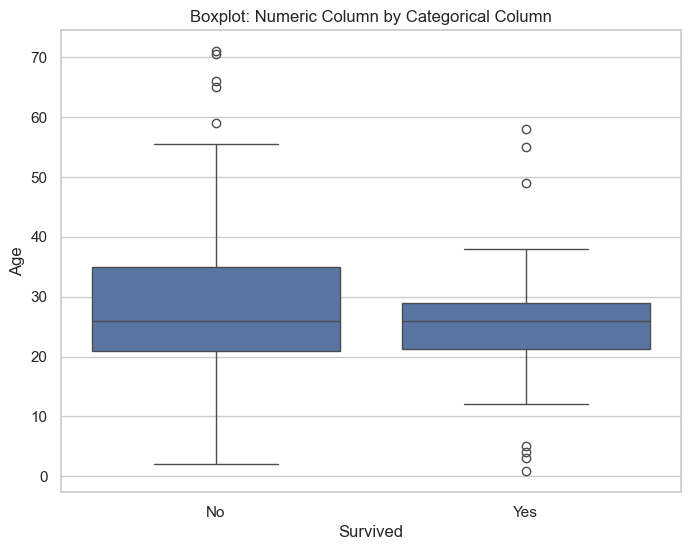

In [29]:
# Boxplot for numeric column grouped by a categorical column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Boxplot: Numeric Column by Categorical Column")
plt.show()

### 7.3 Categorical vs. Categorical

In [30]:
df_not_num = df.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 7 non numerical features including:
['Survived', 'Lname', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [31]:
# We can drop some..
df_not_num.drop(['Lname', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

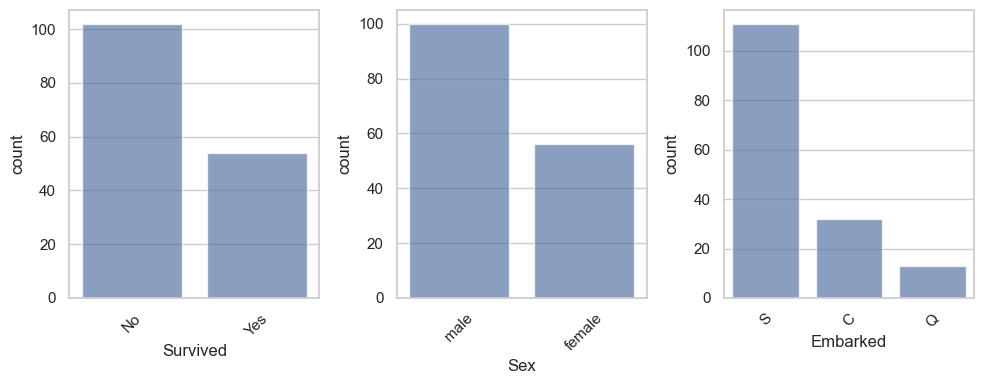

In [32]:
# Let's look at their distribution
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(10, 4))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)
        ax.tick_params(axis='x', rotation=45)

fig.tight_layout()

In [33]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,No,Yes
Sex,,
female,16,40
male,86,14


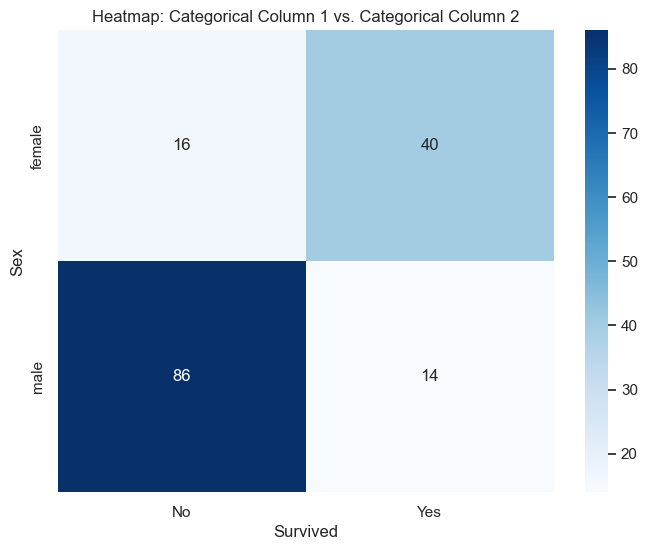

In [34]:
# Cross-tabulation and heatmap
cross_tab = pd.crosstab(df['Sex'], df['Survived'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title("Heatmap: Categorical Column 1 vs. Categorical Column 2")
plt.show()